# Classification Task dengan Support Vector Machine (SVM)

## Dataset: The MNIST database of handwritten digits

In [8]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home='./dataset/mnist', return_X_y=True)
X.shape

(70000, 784)

In [24]:
X.to_numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
for data in X.to_numpy()[:8]:
    print(data)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [23]:
type(X)

pandas.core.frame.DataFrame

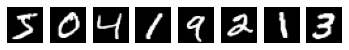

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pos = 1
# for data in X[:8]:
for data in X.to_numpy()[:8]:
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28, 28)),
              cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1
   
plt.show()

In [28]:
y[:8]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [29]:
# X_train = X[:60000]
# y_train = y[:60000]
# X_test = X[:60000]
# y_test = y[:60000]

X_train = X[:1000]
y_train = y[:1000]
X_test = X[:69000]
y_test = y[:69000]

## Classification dengan SVC(Support Vector Classifier)

In [30]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

In [31]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6801
           1       0.95      0.97      0.96      7758
           2       0.89      0.91      0.90      6891
           3       0.93      0.82      0.87      7039
           4       0.89      0.91      0.90      6732
           5       0.82      0.91      0.86      6228
           6       0.95      0.92      0.94      6774
           7       0.91      0.93      0.92      7178
           8       0.91      0.84      0.87      6731
           9       0.85      0.88      0.87      6868

    accuracy                           0.91     69000
   macro avg       0.91      0.91      0.91     69000
weighted avg       0.91      0.91      0.91     69000



## Hyperparameter Tuning dengan GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                          param_grid=parameters,
                          n_jobs=6,
                          verbose=1,
                          scoring='accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [35]:
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Vest Parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

Best Score: 0.907
Vest Parameters:
	kernel: rbf
	C: 10
	gamma: scale


## Predict & Evaluate

In [34]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6801
           1       0.96      0.97      0.97      7758
           2       0.90      0.93      0.91      6891
           3       0.92      0.84      0.88      7039
           4       0.92      0.91      0.91      6732
           5       0.86      0.90      0.88      6228
           6       0.95      0.94      0.95      6774
           7       0.92      0.92      0.92      7178
           8       0.91      0.85      0.88      6731
           9       0.85      0.90      0.88      6868

    accuracy                           0.92     69000
   macro avg       0.91      0.91      0.91     69000
weighted avg       0.92      0.92      0.92     69000

